# Part I

In [17]:
import pymc as pm;from scipy import stats
n,loc_true,scale_true,df_true = 100,10,2,15
x = stats.t(df=df_true, loc=loc_true, scale=scale_true).rvs(n)

metro_model = pm.Model()
with metro_model:
  loc = pm.Normal("loc", mu=0, sigma=10)
  scale = pm.HalfNormal("scale", sigma=5)
  df = pm.Uniform("df", lower=1,upper=100)
  x_obs = pm.StudentT("likelihood", nu=df, mu=loc, sigma=scale)

In [18]:
with metro_model:
    idata_HMC = pm.sample()

# Part II

In [28]:
# (a) effective sample sizes
import arviz as az
az.summary(idata_HMC, round_to=2)

number of MCMC samples: 2000


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
loc,-0.82,9.63,-20.67,16.10,0.43,0.34,500.91,432.53,1.02
likelihood,-0.73,11.14,-21.73,19.37,0.50,0.35,502.02,416.01,1.01
scale,4.53,2.74,0.87,9.38,0.26,0.19,56.73,64.30,1.02
df,51.56,27.22,7.43,98.48,1.02,0.74,747.57,715.27,1.01


According to this table, the effective sample size is about 747.57 for the df parameter

array([[<Axes: title={'center': 'loc'}>, <Axes: title={'center': 'loc'}>],
       [<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'scale'}>],
       [<Axes: title={'center': 'df'}>, <Axes: title={'center': 'df'}>]],
      dtype=object)

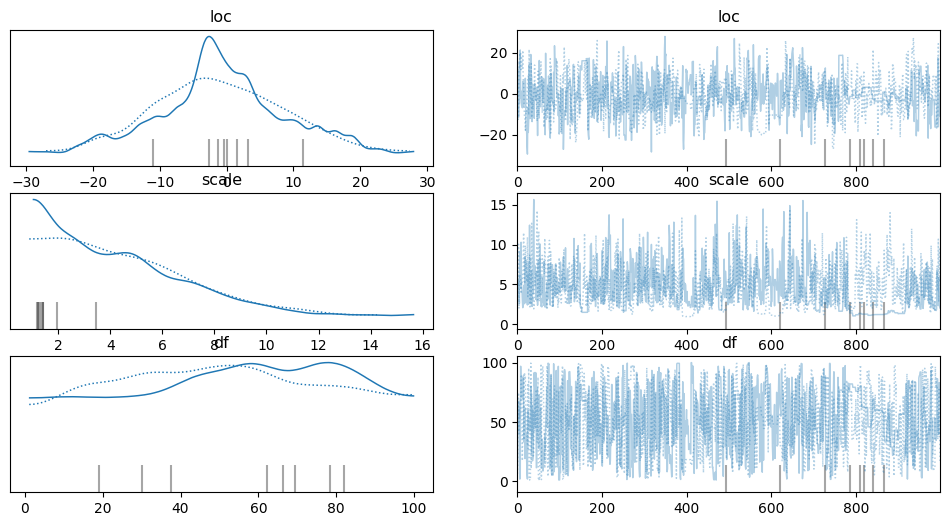

In [36]:
# (b)chain convergence measures
import arviz as az
az.plot_trace(idata_HMC, var_names=["loc", "scale", "df"])

(c) Divergences:
There are 5 divergences and 3 divergences for the chain 0 and chain 1, respectively.

In [40]:
# (d) Metropolis-Hastings acceptance rates
idata_HMC.sample_stats.acceptance_rate.values.flatten()

array([0.97057921, 0.75435828, 0.95140513, ..., 0.87096036, 0.98302975,
       0.96815872])

(e): There are no any other warnings or concerns provided by PyMC

## The Eight Schools example

In [41]:
import numpy as np
J = 8
y = np.array([28.0, 8.0, -3.0, 7.0, -1.0, 1.0, 18.0, 12.0])
sigma = np.array([15.0, 10.0, 16.0, 11.0, 9.0, 11.0, 10.0, 18.0])

In [42]:
import pymc as pm

with pm.Model() as Centered_eight:

    # We assume the following prior distributions for our parameters
    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)

    # and we assume the following probabilistic hierarchy
    # within the data generating mechanism
    theta = pm.Normal("theta", mu=mu, sigma=tau, shape=J) # theta is length J=8

    # Note that if tau was small, then the density evalution above
    # could change rapidly for changes in theta
    # This means that the energy has high curvature

    # likelihood where observed information enters into the model
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

array([7.57529151e-01, 9.72231513e-01, 9.54940855e-01, ...,
       5.70538494e-04, 6.60861775e-02, 3.10133553e-06])

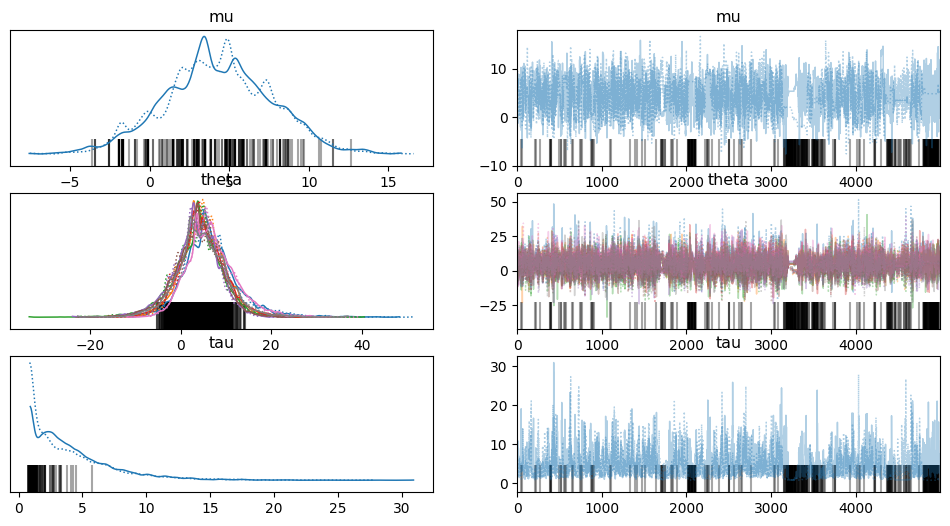

In [45]:
# Centered Model
SEED = [20100420, 20134234] # random seeds for each of two run HMC chains
with Centered_eight:
    fit_C = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                      return_inferencedata=True, idata_kwargs={"log_likelihood": True})


In [47]:
#(a)
az.summary(fit_C, round_to=2)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.30,3.39,-1.98,10.55,0.14,0.10,622.77,372.14,1.01
theta[0],6.60,6.25,-3.97,19.07,0.22,0.16,538.46,1066.22,1.01
theta[1],5.01,5.07,-4.28,14.87,0.15,0.10,978.36,2058.62,1.00
theta[2],3.68,5.66,-7.11,14.17,0.12,0.09,1575.05,3789.16,1.00
theta[3],4.76,5.13,-5.04,14.36,0.15,0.11,964.74,3571.47,1.00
theta[4],3.36,5.07,-6.59,12.71,0.12,0.09,1673.49,2949.01,1.00
theta[5],3.85,5.12,-5.84,13.58,0.11,0.08,1769.35,3374.08,1.00
theta[6],6.71,5.47,-2.65,17.48,0.25,0.17,415.23,977.87,1.01
theta[7],4.86,5.70,-5.74,16.01,0.13,0.09,1248.42,3856.95,1.00
tau,4.30,3.31,0.84,10.22,0.17,0.12,128.66,95.34,1.02


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>]],
      dtype=object)

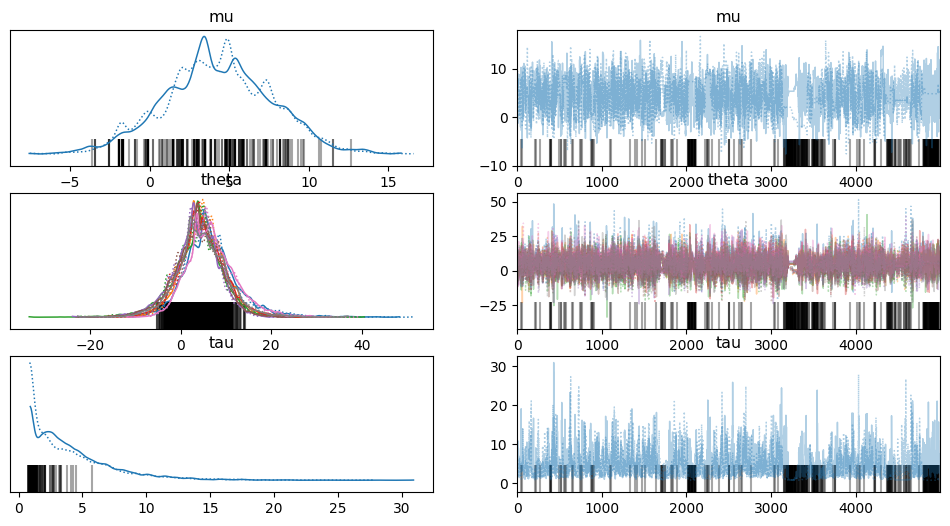

In [51]:

#(b)
az.plot_trace(fit_C)

#(c): There are 71 divergences and 1283 divergences for chain 0 and chain 1, respectively

In [50]:
#(d)
print("The Metropolis-Hastings acceptance rates are:",fit_C.sample_stats.acceptance_rate.values.flatten())

#(e): There are no any other warnings or concerns provided by PyMC

The Metropolis-Hastings acceptance rates are: [7.57529151e-01 9.72231513e-01 9.54940855e-01 ... 5.70538494e-04
 6.60861775e-02 3.10133553e-06]


In [52]:
# Uncentered Model
with pm.Model() as NonCentered_eight:

    mu = pm.Normal("mu", mu=0, sigma=5)
    tau = pm.HalfCauchy("tau", beta=5)
    theta_tilde = pm.Normal("theta_t", mu=0, sigma=1, shape=J)
    # Changes in theta now take place on a fixed scale that is independent of tau

    theta = pm.Deterministic("theta", mu + tau * theta_tilde)
    # Changes in tau can still result in rapid changes in the density evaluations
    # below so the energy still has high curvature with respect to tau; but,
    # it no longer has high curvature with respect to theta
    obs = pm.Normal("obs", mu=theta, sigma=sigma, observed=y)

with NonCentered_eight:
    fit_NC = pm.sample(5000, chains=2, tune=1000, random_seed=SEED,
                       return_inferencedata=True, idata_kwargs={"log_likelihood": True})

In [53]:
#(a)
az.summary(fit_NC, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,4.40,3.30,-1.71,10.69,0.03,0.02,11120.12,6319.82,1.0
theta_t[0],0.33,1.00,-1.52,2.25,0.01,0.01,12332.60,6677.65,1.0
theta_t[1],0.11,0.93,-1.66,1.83,0.01,0.01,13263.21,7097.14,1.0
theta_t[2],-0.08,0.98,-1.97,1.70,0.01,0.01,15199.46,6188.73,1.0
theta_t[3],0.07,0.93,-1.72,1.83,0.01,0.01,14951.30,7291.90,1.0
theta_t[4],-0.15,0.92,-1.87,1.62,0.01,0.01,14707.69,7426.50,1.0
theta_t[5],-0.08,0.94,-1.78,1.75,0.01,0.01,13359.94,7108.87,1.0
theta_t[6],0.35,0.95,-1.43,2.15,0.01,0.01,11562.53,7108.09,1.0
theta_t[7],0.07,0.99,-1.78,1.91,0.01,0.01,15762.83,6727.60,1.0
tau,3.58,3.20,0.00,9.18,0.04,0.03,5121.40,3807.87,1.0


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'theta_t'}>,
        <Axes: title={'center': 'theta_t'}>],
       [<Axes: title={'center': 'tau'}>, <Axes: title={'center': 'tau'}>],
       [<Axes: title={'center': 'theta'}>,
        <Axes: title={'center': 'theta'}>]], dtype=object)

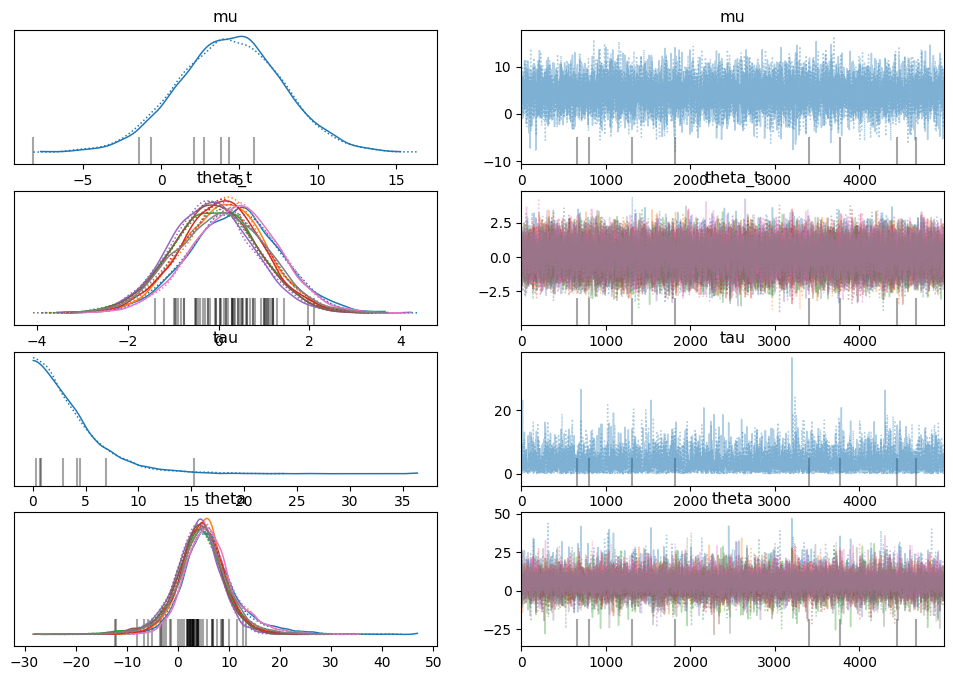

In [54]:
#(b)
az.plot_trace(fit_NC)

#(c): There are 5 divergences and 3 divergences for chain 0 and chain 1, respectively

In [56]:
#(d)
print("The Metropolis-Hastings acceptance rates are:",fit_NC.sample_stats.acceptance_rate.values.flatten())

#(e): There are no any other warnings or concerns provided by PyMC

The Metropolis-Hastings acceptance rates are: [0.88841609 0.76184205 0.911938   ... 0.90839179 1.         0.60394672]


# - From the perspective of curvature of the energy function (that is, how rapidly the log joint posterior distribution density changes for different values of its random variable (parameters) and the effectiveness of the HMC algorithm, explain why the "uncentered" paramterization of the model performs better than the "centered" parameterization.

The uncentered parameterization helps to reduce the interdependencies between parameters by introducing new parameters. And this will also help to smooth the curvature of the energy function which will lead to a faster convergence and more effective sampling.

# - Use the code on the next slide to provide and interpret the diagnostic plot assessing energy proposals versus the empirical energy distribution to compare and contrast the "centered" and "uncentered" Eight Schools models in relation to you previous comparision of these two model parameterization in terms of energy function curvature and the effectiveness of the HMC algorithm... does this diagnostic support your previous conclusions in these regards?

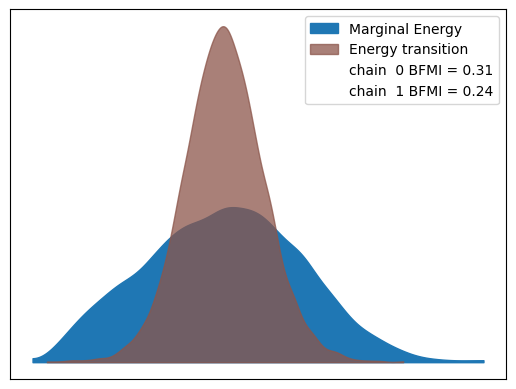

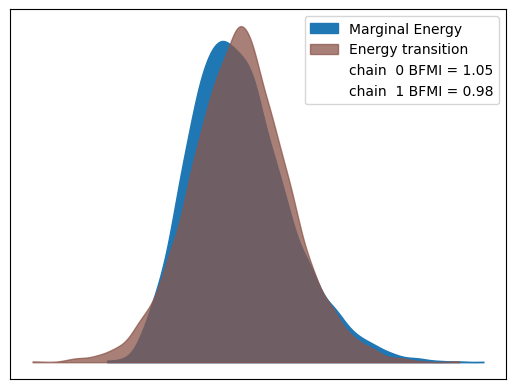

In [57]:
import arviz as az
az.plot_energy(fit_C);
az.plot_energy(fit_NC);

According to the top plot which is corresponding to the centered model, the energy transition distribution is much narrower than the marginal energy distribution. This implies that the HMC algorithm will be slow and ineffective. However, the energy transition distribution is almost matched to the marginal energy distribution for the bottom plot which is corresponding to the uncentered model. This implies that the HMC algorithm will be very effective.